In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

In [2]:
path = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_0/shelf_dx_500_mpdata_uwind_0_avg.nc' #Basecase, increasing wind stress below 
path1 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_001/shelf_dx_500_mpdata_uwind_001_avg.nc'
path2 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_005/shelf_dx_500_mpdata_uwind_005_avg.nc'
path3 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_01/shelf_dx_500_mpdata_uwind_01_avg.nc'
path3_1 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_02/shelf_dx_500_mpdata_uwind_02_avg.nc'
path4 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_05/shelf_dx_500_mpdata_uwind_05_avg.nc'
path5 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_1/shelf_dx_500_mpdata_uwind_1_avg.nc'
path6 = '/d2/home/dylan/idealized_nummix/diurnal_wind/runs/shelf_dx_500_mpdata_uwind_2/shelf_dx_500_mpdata_uwind_2_avg.nc'

ds_0 = xroms.open_netcdf(path)
ds_0, grid_0 = xroms.roms_dataset(ds_0)
ds_0 = ds_0.isel(ocean_time = slice(0,264))

ds_001 = xroms.open_netcdf(path1)
ds_001, grid_001 = xroms.roms_dataset(ds_001)
ds_001 = ds_001.isel(ocean_time = slice(0,264))

ds_005 = xroms.open_netcdf(path2)
ds_005, grid_005 = xroms.roms_dataset(ds_005)
ds_005 = ds_005.isel(ocean_time = slice(0,264))

ds_01 = xroms.open_netcdf(path3)
ds_01, grid_01 = xroms.roms_dataset(ds_01)
ds_01 = ds_01.isel(ocean_time = slice(0,264))

ds_02 = xroms.open_netcdf(path3_1)
ds_02, grid_02 = xroms.roms_dataset(ds_02)
ds_02 = ds_02.isel(ocean_time = slice(0,264))

ds_05 = xroms.open_netcdf(path4)
ds_05, grid_05 = xroms.roms_dataset(ds_05)
ds_05 = ds_05.isel(ocean_time = slice(0,264))

ds_1 = xroms.open_netcdf(path5)
ds_1, grid_1 = xroms.roms_dataset(ds_1)
ds_1 = ds_1.isel(ocean_time = slice(0,264))

ds_2 = xroms.open_netcdf(path6)
ds_2, grid_2 = xroms.roms_dataset(ds_2)
ds_2 = ds_2.isel(ocean_time = slice(0,264))

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/core/indexing.py:422: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/d2/home/dylan/.conda/envs/copano/lib/pyth

In [3]:
print(ds_0.ocean_time[-1].values)
print(ds_001.ocean_time[-1].values)
print(ds_005.ocean_time[-1].values)
print(ds_01.ocean_time[-1].values)
print(ds_02.ocean_time[-1].values)
print(ds_05.ocean_time[-1].values)
print(ds_1.ocean_time[-1].values)
print(ds_2.ocean_time[-1].values)

0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00
0001-01-15 23:30:00


In [4]:
time = np.arange(0,24*11)/24
# len(time)

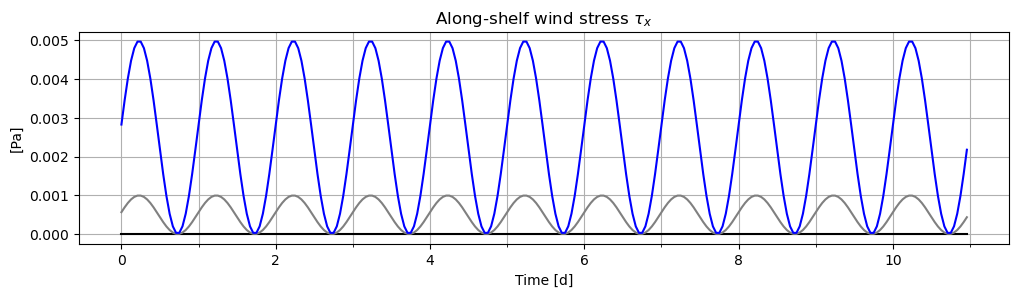

In [5]:
fig, ax = plt.subplots(1, figsize = (12,2.75))
time = np.arange(0,264)/24
plt.plot(time, ds_0.sustr.mean(['eta_rho','xi_u']), color = 'k')
plt.plot(time, ds_001.sustr.mean(['eta_rho','xi_u']), color = 'gray')
plt.plot(time, ds_005.sustr.mean(['eta_rho','xi_u']), color = 'b')
plt.xlabel('Time [d]')
plt.ylabel('[Pa]')
plt.title(r'Along-shelf wind stress $\tau_x$')
plt.grid(which = 'both')
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)

In [6]:
def surface_vorticity(ds, grid):
    '''
Calculates the surface vertical vorticity normalized by 
the Coriolis frequency. 
----
Inputs:
ds - Xarray Dataset
grid - XGCM grid object 
----
Outputs:
rvort_psi: Normalized vorticity on the psi points 

    '''
    u = ds.u.isel(s_rho=-1)
    v = ds.v.isel(s_rho=-1)

    dudy = grid.derivative(u, 'Y')
    dudy = xroms.to_rho(dudy, grid)
    dvdx = grid.derivative(v, 'X')
    dvdx = xroms.to_rho(dvdx, grid)

    rvort_rho = (dvdx-dudy)/ds.f
    
    return rvort_rho 

def surface_div(ds, grid):
    '''
Calculates the surface divergence normalized by 
the Coriolis frequency. 
----
Inputs:
ds - Xarray Dataset
grid - XGCM grid object 
----
Outputs:
rvort_psi: Normalized vorticity on the psi points 

    '''
    u = ds.u.isel(s_rho=-1)
    v = ds.v.isel(s_rho=-1)

    dudx = grid.derivative(u, 'X')
    # dudx = xroms.to_rho(dudx, grid)
    dvdy = grid.derivative(v, 'X')
    # dvdy = xroms.to_rho(dvdx, grid)

    div_rho = (dudx+dvdy)/ds.f
    
    return div_rho 

def surface_saltgradmag(ds, grid):
    '''
Calculates the surface horizontal salinity gradient magnitude normalized by 
the Coriolis frequency. 
----
Inputs:
ds - Xarray Dataset
grid - XGCM grid object 
----
Outputs:
sgradmag: horizontal salinity gradient magnitude on the psi points

    '''
    s = ds.salt.isel(s_rho=-1)

    dsdx = grid.derivative(s, 'X', boundary = 'extend')
    dsdx_psi = xroms.to_rho(dsdx, grid)
    dsdy = grid.derivative(s, 'Y', boundary = 'extend')
    dsdy_psi = xroms.to_rho(dsdy, grid)
    
    sgradmag = (dsdx_psi**2+dsdy_psi**2)**(1/2)
    
    return sgradmag

In [7]:
sgradmag_0 = surface_saltgradmag(ds_0, grid_0)
rv_0 = surface_vorticity(ds_0, grid_0)
vortfinal_0 = rv_0[-1].load()
sgradfinal_0 = sgradmag_0[-1].load()

sgradmag_001 = surface_saltgradmag(ds_001, grid_001)
rv_001 = surface_vorticity(ds_001, grid_001)
vortfinal_001 = rv_001[-1].load()
sgradfinal_001 = sgradmag_001[-1].load()

sgradmag_005 = surface_saltgradmag(ds_005, grid_005)
rv_005 = surface_vorticity(ds_005, grid_005)
vortfinal_005 = rv_005[-1].load()
sgradfinal_005 = sgradmag_005[-1].load()

sgradmag_01 = surface_saltgradmag(ds_01, grid_01)
rv_01 = surface_vorticity(ds_01, grid_01)
vortfinal_01 = rv_01[-1].load()
sgradfinal_01 = sgradmag_01[-1].load()

sgradmag_02 = surface_saltgradmag(ds_02, grid_02)
rv_02 = surface_vorticity(ds_02, grid_02)
vortfinal_02 = rv_02[-1].load()
sgradfinal_02 = sgradmag_02[-1].load()

sgradmag_05 = surface_saltgradmag(ds_05, grid_05)
rv_05 = surface_vorticity(ds_05, grid_05)
vortfinal_05 = rv_05[-1].load()
sgradfinal_05 = sgradmag_05[-1].load()

sgradmag_1 = surface_saltgradmag(ds_1, grid_1)
rv_1 = surface_vorticity(ds_1, grid_1)
vortfinal_1 = rv_1[-1].load()
sgradfinal_1 = sgradmag_1[-1].load()

sgradmag_2 = surface_saltgradmag(ds_2, grid_2)
rv_2 = surface_vorticity(ds_2, grid_2)
vortfinal_2 = rv_2[-1].load()
sgradfinal_2 = sgradmag_2[-1].load()

In [7]:
sgradmag_0 = surface_saltgradmag(ds_0, grid_0)
rv_0 = surface_vorticity(ds_0, grid_0)
vortfinal_0 = rv_0[144].load()
sgradfinal_0 = sgradmag_0[-1].load()

sgradmag_001 = surface_saltgradmag(ds_001, grid_001)
rv_001 = surface_vorticity(ds_001, grid_001)
vortfinal_001 = rv_001[144].load()
sgradfinal_001 = sgradmag_001[-1].load()

sgradmag_005 = surface_saltgradmag(ds_005, grid_005)
rv_005 = surface_vorticity(ds_005, grid_005)
vortfinal_005 = rv_005[144].load()
sgradfinal_005 = sgradmag_005[-1].load()

sgradmag_01 = surface_saltgradmag(ds_01, grid_01)
rv_01 = surface_vorticity(ds_01, grid_01)
vortfinal_01 = rv_01[144].load()
sgradfinal_01 = sgradmag_01[-1].load()

sgradmag_02 = surface_saltgradmag(ds_02, grid_02)
rv_02 = surface_vorticity(ds_02, grid_02)
vortfinal_02 = rv_02[144].load()
sgradfinal_02 = sgradmag_02[-1].load()

sgradmag_05 = surface_saltgradmag(ds_05, grid_05)
rv_05 = surface_vorticity(ds_05, grid_05)
vortfinal_05 = rv_05[144].load()
sgradfinal_05 = sgradmag_05[144].load()

sgradmag_1 = surface_saltgradmag(ds_1, grid_1)
rv_1 = surface_vorticity(ds_1, grid_1)
vortfinal_1 = rv_1[144].load()
sgradfinal_1 = sgradmag_1[-1].load()

sgradmag_2 = surface_saltgradmag(ds_2, grid_2)
rv_2 = surface_vorticity(ds_2, grid_2)
vortfinal_2 = rv_2[144].load()
sgradfinal_2 = sgradmag_2[-1].load()

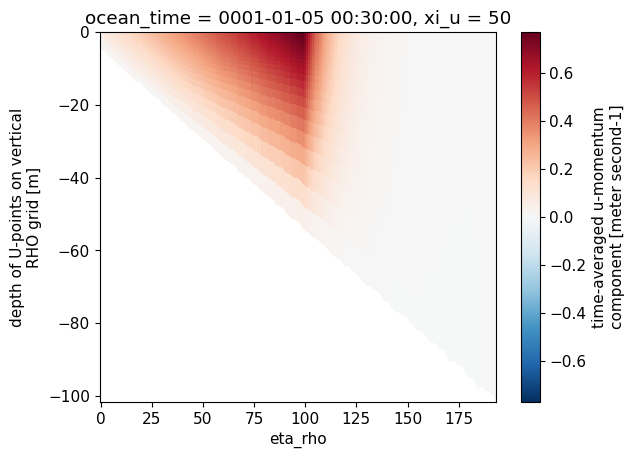

In [18]:
ds_001.u[0,:,:,50].plot(x = 'eta_rho', y = 'z_rho_u0')

[Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, ''),
 Text(0, 100.0, '')]

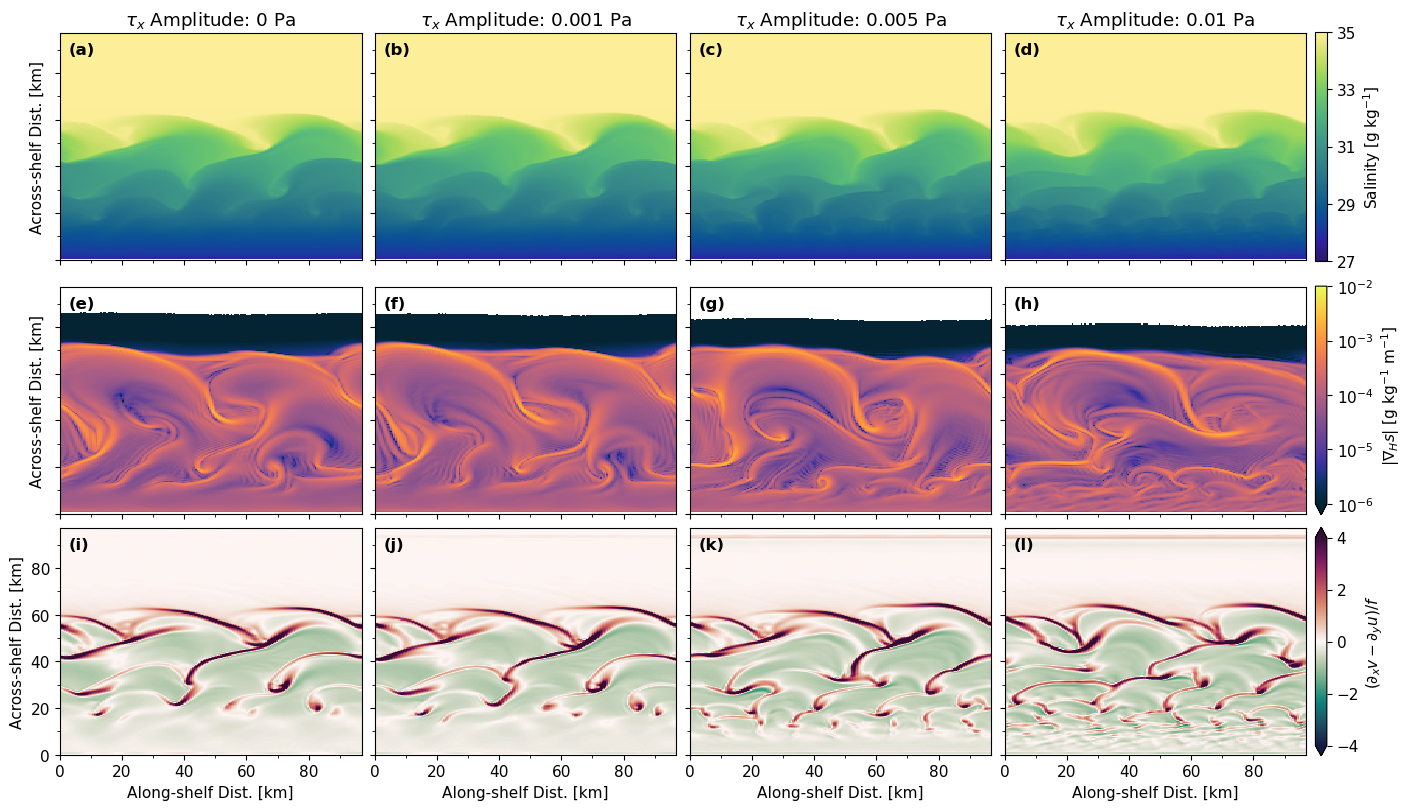

In [8]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(3,4, figsize = ((7/2)*4,8), constrained_layout = True)

#salt
mappable1 = ax[0,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_0.salt[144,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable2 = ax[0,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_001.salt[144,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable3 = ax[0,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_005.salt[144,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable4 = ax[0,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_01.salt[144,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
cbar = fig.colorbar(mappable4, ax = ax[0,3], label = '', pad = 0.03, ticks = [27, 29, 31, 33, 35],)
cbar.ax.set_ylabel(r'Salinity [g kg$^{-1}$]')

mappable5 = ax[1,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_0[1:].where(sgradfinal_0[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable6 = ax[1,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_001[1:].where(sgradfinal_001[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable7 = ax[1,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_005[1:].where(sgradfinal_005[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable8 = ax[1,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_01[1:].where(sgradfinal_01[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
cbar = fig.colorbar(mappable8, ax = ax[1,3], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'), pad = 0.03, ticks = [-6,-5,-4,-3,-2])
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

mappable9 = ax[2,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_0[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable10 = ax[2,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_001[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable11 = ax[2,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_005[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable12 = ax[2,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_01[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
cbar = fig.colorbar(mappable12, ax = ax[2,3], label = '', extend = 'both', pad = 0.03, ticks = [-4,-2,0,2,4])
cbar.ax.set_ylabel(r'$(\partial_x v - \partial_y u)/f$')

for i in range(3):
    for j in range(4):
        ax[i,j].set(xlim=[0,97], ylim=[0,97], aspect = 0.75)
        ax[i,0].set_ylabel('Across-shelf Dist. [km]')
        ax[2,j].set_xlabel('Along-shelf Dist. [km]')
        ax[i,1].set_yticklabels([])
        minor_locator = AutoMinorLocator(2)
        ax[i,j].xaxis.set_minor_locator(minor_locator)
        ax[i,j].yaxis.set_minor_locator(minor_locator)

ax[0,0].set_title(r'$\tau_x$ Amplitude: 0 Pa')
ax[0,1].set_title(r'$\tau_x$ Amplitude: 0.001 Pa')
ax[0,2].set_title(r'$\tau_x$ Amplitude: 0.005 Pa')
ax[0,3].set_title(r'$\tau_x$ Amplitude: 0.01 Pa')
        
ax[0,0].annotate('(a)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,1].annotate('(b)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,2].annotate('(c)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,3].annotate('(d)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,0].annotate('(e)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,1].annotate('(f)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,2].annotate('(g)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,3].annotate('(h)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,0].annotate('(i)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,1].annotate('(j)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,2].annotate('(k)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,3].annotate('(l)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
# fig.constrained_layout()
for i in range(2):
    for j in range(4):
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        
ax[2,2].set_yticklabels([])
ax[2,3].set_yticklabels([])
# ax[3,3].set_yticklabels([])
# plt.subplots_adjust(wspace = -0.2)
# plt.savefig('shelfstrat_wind_surface_snap.jpg', dpi = 300, bbox_inches='tight')

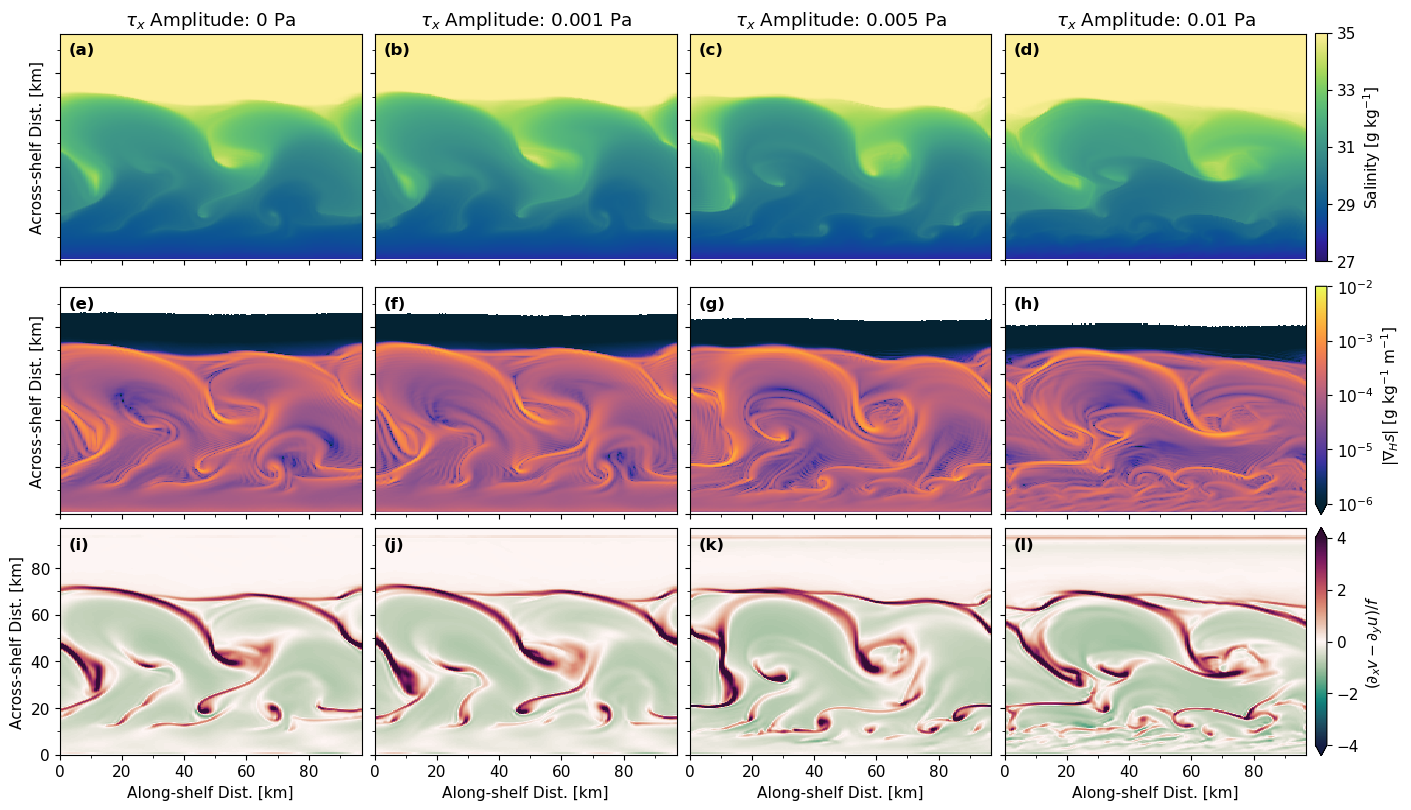

In [12]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(3,4, figsize = ((7/2)*4,8), constrained_layout = True)

#salt
mappable1 = ax[0,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_0.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable2 = ax[0,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_001.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable3 = ax[0,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_005.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable4 = ax[0,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_01.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
cbar = fig.colorbar(mappable4, ax = ax[0,3], label = '', pad = 0.03, ticks = [27, 29, 31, 33, 35],)
cbar.ax.set_ylabel(r'Salinity [g kg$^{-1}$]')

mappable5 = ax[1,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_0[1:].where(sgradfinal_0[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable6 = ax[1,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_001[1:].where(sgradfinal_001[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable7 = ax[1,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_005[1:].where(sgradfinal_005[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable8 = ax[1,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_01[1:].where(sgradfinal_01[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
cbar = fig.colorbar(mappable8, ax = ax[1,3], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'), pad = 0.03, ticks = [-6,-5,-4,-3,-2])
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

mappable9 = ax[2,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_0[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable10 = ax[2,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_001[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable11 = ax[2,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_005[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable12 = ax[2,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_01[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
cbar = fig.colorbar(mappable12, ax = ax[2,3], label = '', extend = 'both', pad = 0.03, ticks = [-4,-2,0,2,4])
cbar.ax.set_ylabel(r'$(\partial_x v - \partial_y u)/f$')

for i in range(3):
    for j in range(4):
        ax[i,j].set(xlim=[0,97], ylim=[0,97], aspect = 0.75)
        ax[i,0].set_ylabel('Across-shelf Dist. [km]')
        ax[2,j].set_xlabel('Along-shelf Dist. [km]')
        ax[i,1].set_yticklabels([])
        minor_locator = AutoMinorLocator(2)
        ax[i,j].xaxis.set_minor_locator(minor_locator)
        ax[i,j].yaxis.set_minor_locator(minor_locator)

ax[0,0].set_title(r'$\tau_x$ Amplitude: 0 Pa')
ax[0,1].set_title(r'$\tau_x$ Amplitude: 0.001 Pa')
ax[0,2].set_title(r'$\tau_x$ Amplitude: 0.005 Pa')
ax[0,3].set_title(r'$\tau_x$ Amplitude: 0.01 Pa')
        
ax[0,0].annotate('(a)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,1].annotate('(b)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,2].annotate('(c)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,3].annotate('(d)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,0].annotate('(e)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,1].annotate('(f)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,2].annotate('(g)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,3].annotate('(h)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,0].annotate('(i)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,1].annotate('(j)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,2].annotate('(k)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,3].annotate('(l)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
# fig.constrained_layout()
for i in range(2):
    for j in range(4):
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        
ax[2,2].set_yticklabels([])
ax[2,3].set_yticklabels([])
# ax[3,3].set_yticklabels([])
# plt.subplots_adjust(wspace = -0.2)
plt.savefig('shelfstrat_wind_surface_snap.jpg', dpi = 300, bbox_inches='tight')

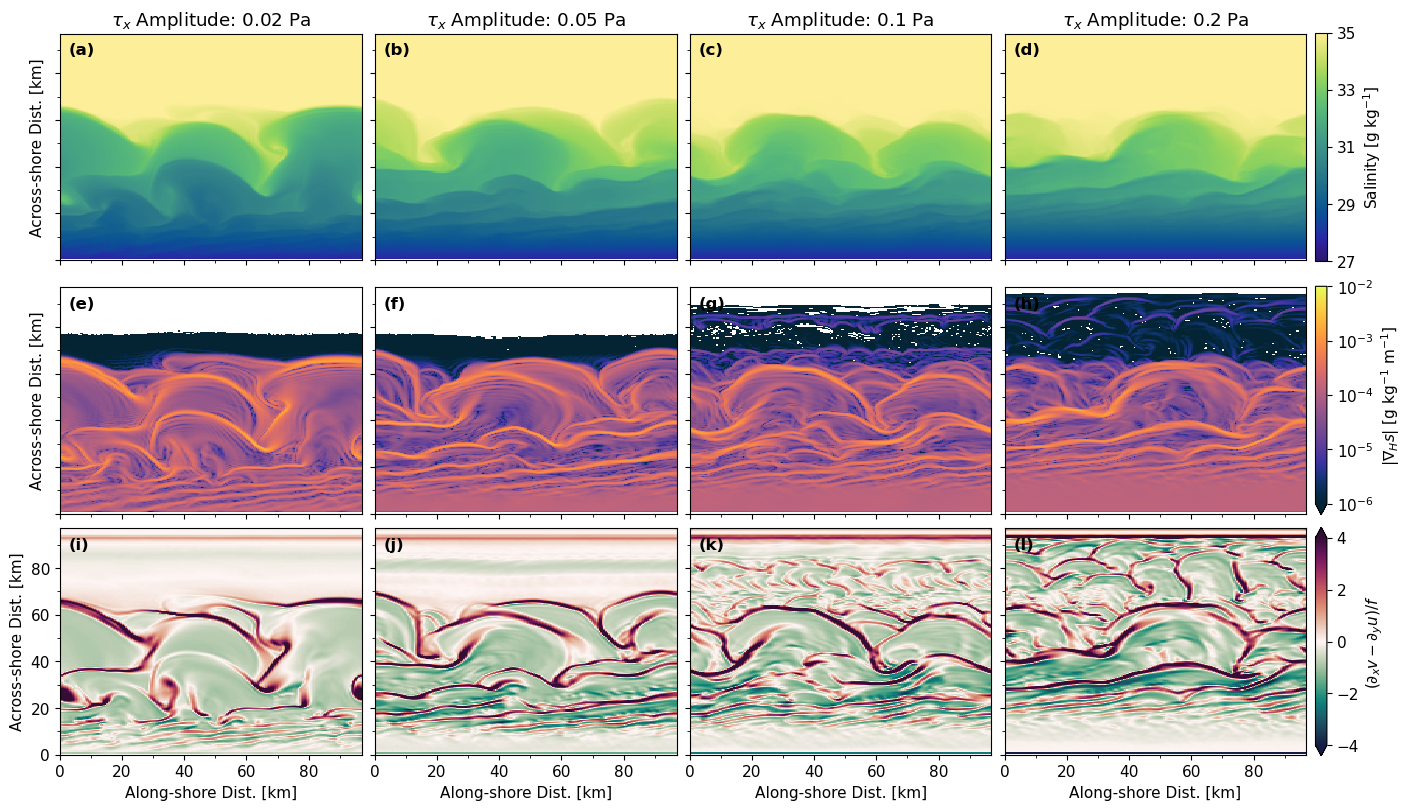

In [19]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(3,4, figsize = ((7/2)*4,8), constrained_layout = True)

#salt
mappable1 = ax[0,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_02.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable2 = ax[0,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_05.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable3 = ax[0,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_1.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable4 = ax[0,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_2.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
cbar = fig.colorbar(mappable4, ax = ax[0,3], label = '', pad = 0.03, ticks = [27, 29, 31, 33, 35],)
cbar.ax.set_ylabel(r'Salinity [g kg$^{-1}$]')

mappable5 = ax[1,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_02[1:].where(sgradfinal_02[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable6 = ax[1,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_05[1:].where(sgradfinal_05[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable7 = ax[1,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_1[1:].where(sgradfinal_1[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable8 = ax[1,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_2[1:].where(sgradfinal_2[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
cbar = fig.colorbar(mappable8, ax = ax[1,3], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'), pad = 0.03, ticks = [-6,-5,-4,-3,-2])
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

mappable9 = ax[2,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_02[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable10 = ax[2,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_05[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable11 = ax[2,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_1[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable12 = ax[2,3].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_2[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
cbar = fig.colorbar(mappable12, ax = ax[2,3], label = '', extend = 'both', pad = 0.03, ticks = [-4,-2,0,2,4])
cbar.ax.set_ylabel(r'$(\partial_x v - \partial_y u)/f$')

for i in range(3):
    for j in range(4):
        ax[i,j].set(xlim=[0,97], ylim=[0,97], aspect = 0.75)
        ax[i,0].set_ylabel('Across-shore Dist. [km]')
        ax[2,j].set_xlabel('Along-shore Dist. [km]')
        ax[i,1].set_yticklabels([])
        minor_locator = AutoMinorLocator(2)
        ax[i,j].xaxis.set_minor_locator(minor_locator)
        ax[i,j].yaxis.set_minor_locator(minor_locator)

ax[0,0].set_title(r'$\tau_x$ Amplitude: 0.02 Pa')
ax[0,1].set_title(r'$\tau_x$ Amplitude: 0.05 Pa')
ax[0,2].set_title(r'$\tau_x$ Amplitude: 0.1 Pa')
ax[0,3].set_title(r'$\tau_x$ Amplitude: 0.2 Pa')
        
ax[0,0].annotate('(a)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,1].annotate('(b)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,2].annotate('(c)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,3].annotate('(d)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,0].annotate('(e)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,1].annotate('(f)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,2].annotate('(g)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,3].annotate('(h)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,0].annotate('(i)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,1].annotate('(j)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,2].annotate('(k)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,3].annotate('(l)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
# fig.constrained_layout()
for i in range(2):
    for j in range(4):
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        
ax[2,2].set_yticklabels([])
ax[2,3].set_yticklabels([])
# ax[3,3].set_yticklabels([])
# plt.subplots_adjust(wspace = -0.2)
plt.savefig('shelfstrat_wind_surface_snap_more.jpg', dpi = 300, bbox_inches='tight')

# Make animation for the base case 

In [15]:
sgradmag_0 = surface_saltgradmag(ds_0, grid_0)
rv_0 = surface_vorticity(ds_0, grid_0)
vortfinal_0 = rv_0[-1].load()
sgradfinal_0 = sgradmag_0[-1].load()

hours = np.arange(720)
h_day = np.arange(24)
hours_since0 = np.tile(h_day, 30)
timevec_days = np.trunc(np.arange(0,264)/24)

In [17]:
plt.rcParams.update({'font.size': 11})

for tcount in range(len(ds_0.ocean_time)):
    fig, ax = plt.subplots(3,1, figsize = (12,9), constrained_layout = True)

    #salt
    mappable = ax[0].pcolormesh(ds_0.x_rho[:]/1000, ds_0.y_rho[:]/1000, ds_0.salt[tcount,-1,:,:], cmap = cmo.haline, vmin = 27, vmax = 35)
    cbar = fig.colorbar(mappable, ax = ax[0], label = '', pad = 0.03, ticks = [27, 29, 31, 33, 35],)
    cbar.ax.set_ylabel(r'[g kg$^{-1}$]')

    #Horizontal salinity gradient
    mappable = ax[1].pcolormesh(ds_0.x_rho[:]/1000, ds_0.y_rho[:]/1000, np.log10(sgradmag_0[tcount].where(sgradmag_0[tcount]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
    cbar = fig.colorbar(mappable, ax = ax[1], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'), pad = 0.03)
    cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

    #Relative vertical vorticity 
    mappable = ax[2].pcolormesh(ds_0.x_rho[:]/1000, ds_0.y_rho[:]/1000, rv_0[tcount], cmap = cmo.curl, vmin = -3, vmax = 3)
    cbar = fig.colorbar(mappable, ax = ax[2], label = '', extend = 'both', pad = 0.03)
    cbar.ax.set_ylabel(r'$(\partial_x v - \partial_y u)/f$')

    for i in range(3):
            ax[i].set(xlim=[0,97], ylim=[0,97], aspect = 0.8)
            ax[i].set_ylabel('Across-shelf dist. [km]')
            minor_locator = AutoMinorLocator(2)
            ax[i].xaxis.set_minor_locator(minor_locator)
            ax[i].yaxis.set_minor_locator(minor_locator)

    ax[2].set_xlabel('Along-shelf dist. [km]')
    for i in range(2):
            ax[i].set_xticklabels([])

    ax[0].set_title('Salinity: ' + 'Day ' + str(int(timevec_days[tcount])) + ' Hour ' + str(hours_since0[tcount]))
    ax[1].set_title('Horz. salinity gradient: ' + 'Day ' + str(int(timevec_days[tcount])) + ' Hour ' + str(hours_since0[tcount]))
    ax[2].set_title('Relative vorticity: ' + 'Day ' + str(int(timevec_days[tcount])) + ' Hour ' + str(hours_since0[tcount]))
    ax[0].annotate('(a)', xy = (3,88), color = 'k', fontsize = 10, fontweight='bold')
    ax[1].annotate('(b)', xy = (3,88), color = 'k', fontsize = 10, fontweight='bold')
    ax[2].annotate('(c)', xy = (3,88), color = 'k', fontsize = 10, fontweight='bold')


    path = '/d2/home/dylan/idealized_nummix/diurnal_wind/ani/shelf_dx_500_mpdata_hour_'+ str(int(hours[tcount]))+'.jpg'
    # path = '/d2/home/dylan/idealized_nummix/diurnal_wind/ani/shelf_dx_500_diurnal_uwind_4_hour_'+ str(int(hours[tcount]))+'.jpg'
    # path = '/d2/home/dylan/idealized_nummix/diurnal_wind/ani/shelf_dx_500_semidiurnal_uwind_4_hour_'+ str(int(hours[tcount]))+'.jpg'
    plt.savefig(path, dpi = 300, bbox_inches='tight')
    plt.clf()

/tmp/ipykernel_17730/530846194.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,1, figsize = (12,9), constrained_layout = True)


<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

<Figure size 1200x900 with 0 Axes>

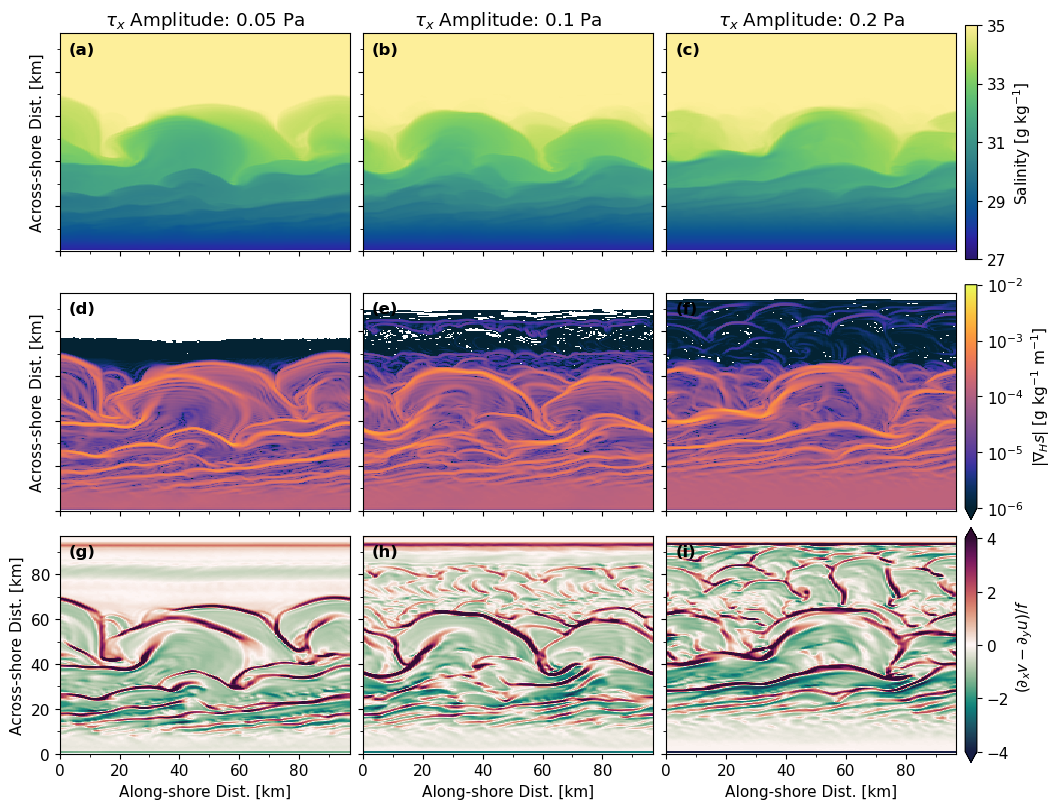

In [14]:
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(3,3, figsize = ((7/2)*3,8), constrained_layout = True)

#salt
mappable1 = ax[0,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_05.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable2 = ax[0,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_1.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
mappable3 = ax[0,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, ds_2.salt[-1,-1][1:], cmap = cmo.haline, vmin = 27, vmax = 35)
cbar = fig.colorbar(mappable3, ax = ax[0,2], label = '', pad = 0.03, ticks = [27, 29, 31, 33, 35],)
cbar.ax.set_ylabel(r'Salinity [g kg$^{-1}$]')

mappable5 = ax[1,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_05[1:].where(sgradfinal_05[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable6 = ax[1,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_1[1:].where(sgradfinal_1[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
mappable7 = ax[1,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, np.log10(sgradfinal_2[1:].where(sgradfinal_2[1:]>1e-7)), cmap = cmo.thermal, vmin = -6, vmax = -2)
cbar = fig.colorbar(mappable7, ax = ax[1,2], label = '', extend = 'min', format=tick.FormatStrFormatter('$10^{%d}$'), pad = 0.03, ticks = [-6,-5,-4,-3,-2])
cbar.ax.set_ylabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')

mappable9 = ax[2,0].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_05[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable10 = ax[2,1].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_1[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
mappable11 = ax[2,2].pcolormesh(ds_0.x_rho[1:]/1000, ds_0.y_rho[1:]/1000, vortfinal_2[1:], cmap = cmo.curl, vmin = -4, vmax = 4)
cbar = fig.colorbar(mappable11, ax = ax[2,2], label = '', extend = 'both', pad = 0.03, ticks = [-4,-2,0,2,4])
cbar.ax.set_ylabel(r'$(\partial_x v - \partial_y u)/f$')

for i in range(3):
    for j in range(3):
        ax[i,j].set(xlim=[0,97], ylim=[0,97], aspect = 0.75)
        ax[i,0].set_ylabel('Across-shore Dist. [km]')
        ax[2,j].set_xlabel('Along-shore Dist. [km]')
        ax[i,1].set_yticklabels([])
        minor_locator = AutoMinorLocator(2)
        ax[i,j].xaxis.set_minor_locator(minor_locator)
        ax[i,j].yaxis.set_minor_locator(minor_locator)

ax[0,0].set_title(r'$\tau_x$ Amplitude: 0.05 Pa')
ax[0,1].set_title(r'$\tau_x$ Amplitude: 0.1 Pa')
ax[0,2].set_title(r'$\tau_x$ Amplitude: 0.2 Pa')
# ax[0,3].set_title(r'$\tau_x$ Amplitude: 0.01 Pa')
        
ax[0,0].annotate('(a)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,1].annotate('(b)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[0,2].annotate('(c)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,0].annotate('(d)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,1].annotate('(e)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[1,2].annotate('(f)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,0].annotate('(g)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,1].annotate('(h)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
ax[2,2].annotate('(i)', xy = (3, 88), color = 'k', fontsize = 12, fontweight='bold')
# fig.constrained_layout()
for i in range(2):
    for j in range(3):
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])
        
ax[2,2].set_yticklabels([])
# ax[2,3].set_yticklabels([])
# ax[3,3].set_yticklabels([])
# plt.subplots_adjust(wspace = -0.2)
plt.savefig('shelfstrat_wind_surface_snap_more.jpg', dpi = 300, bbox_inches='tight')

# Now look at divergence and SSH 

In [32]:
div_0 = surface_div(ds_0, grid_0)
div_0final = div_0[-1].load()

ValueError: `boundary` must be 'fill', 'extend' or 'extrapolate', not None.